In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
X,y=load_digits().data,load_digits().target

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
X.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

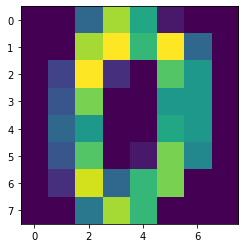

In [ ]:
plt.imshow(X[0].reshape(8,8))

In [ ]:
def softmax(a):
  e_a=np.exp(a)
  ans=e_a/np.sum(e_a,axis=1, keepdims= True)
  return ans

In [ ]:
softmax([[90,10],[70,30]])

array([[1.00000000e+00, 1.80485139e-35],
       [1.00000000e+00, 4.24835426e-18]])

In [ ]:
class NN:
  def __init__(self,input_size=64,layers=[500,1000],output=10):
    np.random.seed(0)
    model = {}
    model['w1']=np.random.randn(input_size,layers[0])
    model['b1']=np.zeros((1,layers[0]))

    model['w2']=np.random.randn(layers[0],layers[1])
    model['b2']=np.zeros((1,layers[1]))

    model['w3']=np.random.randn(layers[1],output)
    model['b3']=np.zeros((1,output))

    self.model=model

  def forward(self,X):
    z1 = np.dot(X,self.model['w1']) + self.model['b1']
    a1=np.tanh(z1)

    z2 = np.dot(a1,self.model['w2']) + self.model['b2']
    a2=np.tanh(z2)

    z3 = np.dot(a2,self.model['w3']) + self.model['b3']
    y_=softmax(z3)

    self.activation_outputs=(a1,a2,y_)
    return y_

  def backward(self,X,y,learning_rate=0.01):
    w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
    b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
    m=X.shape[0]
    a1,a2,y_=self.activation_outputs

    delta3=y_-y
    dw3=np.dot(a2.T,delta3)
    db3=np.sum(delta3,axis=0)/float(m)

    delta2=(1-np.square((a2))*np.dot(delta3,w3.T))
    dw2=np.dot(a1.T,delta2)
    db2=np.sum(delta2,axis=0)/float(m)

    delta1=(1-np.square((a1))*np.dot(delta2,w2.T))
    dw1=np.dot(X.T,delta1)
    db1=np.sum(delta1,axis=0)/float(m)

    self.model['w1'] -=learning_rate*dw1/m
    self.model['b1'] -=learning_rate*db1

    self.model['w2'] -=learning_rate*dw2/m
    self.model['b2'] -=learning_rate*db2

    self.model['w3'] -=learning_rate*dw3/m
    self.model['b3'] -=learning_rate*db3

  def predict(self,X):
    y_out=self.forward(X)
    return np.argmax(y_out,axis=1)


In [ ]:
def loss(y_oht,y_):
    l=-np.mean(y_oht*np.log(y_))
    return l

In [ ]:
def one_hot(y,depth):
  m=y.shape[0]
  y_oht=np.zeros((m,depth))
  y_oht[np.arange(m),y] = 1
  return y_oht

In [ ]:
from math import log10
def train(X,y,model,epochs,learning_rate=0.01,logs=True):
  training_loss=[]
  classes=10
  y_oht=one_hot(y,classes)
  for ix in range (epochs):
    y_=model.forward(X)
    l=loss(y_oht,y_)
    model.backward(X,y_oht,learning_rate)
    training_loss.append(l)
    if(logs):
      print("Epoch %d Loss %.4f"%(ix,l))
  return training_loss

In [ ]:
model = NN()

In [ ]:
loss = train(X,y,model,700)

Epoch 0 Loss 4.6186
Epoch 1 Loss 4.8653
Epoch 2 Loss 4.1271
Epoch 3 Loss 3.9874
Epoch 4 Loss 2.8601
Epoch 5 Loss 2.9716
Epoch 6 Loss 3.1685
Epoch 7 Loss 3.0183
Epoch 8 Loss 2.0481
Epoch 9 Loss 2.4723
Epoch 10 Loss 3.4921
Epoch 11 Loss 5.1966
Epoch 12 Loss 5.1050
Epoch 13 Loss 5.4818
Epoch 14 Loss 6.6960
Epoch 15 Loss 7.5437
Epoch 16 Loss 4.2130
Epoch 17 Loss 8.6878
Epoch 18 Loss 11.6708
Epoch 19 Loss 6.1238
Epoch 20 Loss 3.4990
Epoch 21 Loss 2.1721
Epoch 22 Loss 4.0179
Epoch 23 Loss 7.0235
Epoch 24 Loss 8.7207
Epoch 25 Loss 8.4431
Epoch 26 Loss 5.6812
Epoch 27 Loss 8.7287
Epoch 28 Loss 15.0967
Epoch 29 Loss 17.1045
Epoch 30 Loss 15.8082
Epoch 31 Loss 8.6341
Epoch 32 Loss 8.5329
Epoch 33 Loss 4.5787
Epoch 34 Loss 11.9232
Epoch 35 Loss 15.3653
Epoch 36 Loss 18.4135
Epoch 37 Loss 13.4955
Epoch 38 Loss 8.7515
Epoch 39 Loss 6.7375
Epoch 40 Loss 8.8414
Epoch 41 Loss 11.3392
Epoch 42 Loss 6.5245
Epoch 43 Loss 9.4916
Epoch 44 Loss 13.1106
Epoch 45 Loss 12.4943
Epoch 46 Loss 7.9389
Epoch 47 Los

In [ ]:
ypred=model.predict(X)

In [ ]:
np.mean(ypred==y)

0.6132442960489705

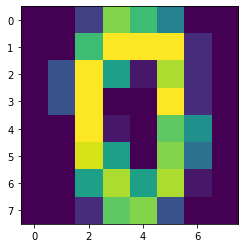

In [ ]:
plt.imshow(X[20].reshape(8,8))

In [ ]:
ypred[20]

0

In [ ]:
y[2]

2